<a href="https://colab.research.google.com/github/leeyuuj/Deep-Learning-portfolio/blob/main/Convolutional%20Neural%20Networks/Code/tf2_od_api_faster_rcnn_resnet50_tl_retrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/google_drive')

Mounted at /content/google_drive


In [ ]:
!nvidia-smi

Tue Dec 13 04:57:33 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    26W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install -U "tensorflow>=2.5"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 21 kB/s 
     |████████████████████████████████| 6.0 MB 84.9 MB/s 
     |████████████████████████████████| 1.7 MB 70.2 MB/s 
     |████████████████████████████████| 439 kB 78.0 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u


<div><div class="highlight-default notranslate"><div class="highlight"><pre><span></span>content/
├─ scripts/ (Google Drive Mount)
│  └─ preprocessing/
├─ models/
│  ├─ community/
│  ├─ official/
│  ├─ orbit/
│  ├─ research/
│  └─ ...
└─ workspace/ (Google Drive Mount)
    └─ training_demo/
</pre></div>


<div><div class="highlight-default notranslate"><div class="highlight"><pre><span></span>training_demo/
├─ annotations/
├─ exported-models/
├─ images/
│  ├─ test/
│  └─ train/
├─ models/
├─ pre-trained-models/
└─ README.md
</pre></div>

In [ ]:
import tensorflow as tf

In [ ]:
import os
import pathlib

import matplotlib
import matplotlib.pyplot as plt

import io
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from six.moves.urllib.request import urlopen


# import tensorflow_hub as hub

tf.get_logger().setLevel('ERROR')

In [ ]:
import re
from shutil import copyfile
import argparse
import math
import random

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

In [ ]:
# Clone the tensorflow models repository
!git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 3630, done.
remote: Counting objects: 100% (3630/3630), done.
remote: Compressing objects: 100% (3027/3027), done.
remote: Total 3630 (delta 959), reused 1552 (delta 548), pack-reused 0
Receiving objects: 100% (3630/3630), 47.12 MiB | 16.12 MiB/s, done.
Resolving deltas: 100% (959/959), done.


In [ ]:
%%bash
sudo apt install -y protobuf-compiler
cd /content/models/research/
protoc object_detection/protos/*.proto --python_out=.
cd /content
git clone https://github.com/cocodataset/cocoapi.git
cd /content/cocoapi/PythonAPI
make
cp -r pycocotools /content/models/research/
cd /content/models/research/
cp object_detection/packages/tf2/setup.py .
python -m pip install .
cd /content

Reading package lists...
Building dependency tree...
Reading state information...
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.8
creating build/temp.linux-x86_64-3.8/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.8/dist-packages/numpy/core/include -I../common -I/usr/include/python3.8 -c ../com



Cloning into 'cocoapi'...
../common/maskApi.c: In function ‘rleDecode’:
../common/maskApi.c:46:7: warning: this ‘for’ clause does not guard... [-Wmisleading-indentation]
       for( k=0; k<R[i].cnts[j]; k++ ) *(M++)=v; v=!v; }}
       ^~~
../common/maskApi.c:46:49: note: ...this statement, but the latter is misleadingly indented as if it were guarded by the ‘for’
       for( k=0; k<R[i].cnts[j]; k++ ) *(M++)=v; v=!v; }}
                                                 ^
../common/maskApi.c: In function ‘rleFrPoly’:
../common/maskApi.c:166:3: warning: this ‘for’ clause does not guard... [-Wmisleading-indentation]
   for(j=0; j<k; j++) x[j]=(int)(scale*xy[j*2+0]+.5); x[k]=x[0];
   ^~~
../common/maskApi.c:166:54: note: ...this statement, but the latter is misleadingly indented as if it were guarded by the ‘for’
   for(j=0; j<k; j++) x[j]=(int)(scale*xy[j*2+0]+.5); x[k]=x[0];
                                                      ^
../common/maskApi.c:167:3: warning: this ‘for’ clause doe

In [ ]:
!python /content/models/research/object_detection/builders/model_builder_tf2_test.py

2022-12-16 06:54:49.085119: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-12-16 06:54:49.085301: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-12-16 06:54:49.085325: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
Running tests under Python 3.8.16: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-12-16 06:54:54.460555: W tensorflow/core/commo

In [ ]:
output_directory = '/content/tf_lite'

In [ ]:
!python /content/models/research/object_detection/export_tflite_graph_tf2.py \
--trained_checkpoint_dir="/content/google_drive/MyDrive/RetinaNet_prac/workspace/exported_models/checkpoint" \      # efficientdet 트레이닝한 모델 경로
--output_directory='/content/tf_lite' \
--pipeline_config_path="/content/google_drive/MyDrive/RetinaNet_prac/workspace/exported_models/pipeline.config"

In [ ]:
!ls -lah /content/tf_lite/saved_model/

total 7.9M
drwxr-xr-x 4 root root 4.0K Dec 14 07:58 .
drwxr-xr-x 3 root root 4.0K Dec 14 07:58 ..
drwxr-xr-x 2 root root 4.0K Dec 14 07:58 assets
-rw-r--r-- 1 root root   57 Dec 14 07:58 fingerprint.pb
-rw-r--r-- 1 root root 7.9M Dec 14 07:58 saved_model.pb
drwxr-xr-x 2 root root 4.0K Dec 14 07:58 variables


In [ ]:
!tflite_convert --saved_model_dir=/content/tf_lite/saved_model/ --output_file=tf_lite/model.tflite

2022-12-14 07:58:20.304175: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-12-14 07:58:20.304285: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-12-14 07:58:20.304309: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
2022-12-14 07:58:23.802800: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environme

In [ ]:
!ls -lah tf_lite/model.tflite

-rw-r--r-- 1 root root 195M Dec 14 07:58 tf_lite/model.tflite


In [ ]:
# based on https://github.com/tensorflow/examples/blob/master/lite/examples/object_detection/raspberry_pi/detect_picamera.py

from PIL import Image, ImageDraw, ImageFont
import re, glob
from six import BytesIO
import numpy as np
%matplotlib inline

def draw_image(image, results, size):
    result_size = len(results)
    for idx, obj in enumerate(results):
        # Prepare image for drawing
        draw = ImageDraw.Draw(image)

        # Prepare boundary box
        xmin, ymin, xmax, ymax = obj['bounding_box']
        xmin = int(xmin * size[1])
        xmax = int(xmax * size[1])
        ymin = int(ymin * size[0])
        ymax = int(ymax * size[0])

        # Draw rectangle to desired thickness
        for x in range( 0, 4 ):
            draw.rectangle((ymin, xmin, ymax, xmax), outline=(255, 255, 0), width=5)

    displayImage = np.asarray( image )
    display(Image.fromarray(displayImage))

def load_labels(path):
    """Loads the labels file. Supports files with or without index numbers."""
    with open(path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        labels = {}
        for row_number, content in enumerate(lines):
            pair = re.split(r'[:\s]+', content.strip(), maxsplit=1)
            if len(pair) == 2 and pair[0].strip().isdigit():
                labels[int(pair[0])] = pair[1].strip()
            else:
                labels[row_number] = pair[0].strip()
    return labels

def set_input_tensor(interpreter, image):
    """Sets the input tensor."""
    tensor_index = interpreter.get_input_details()[0]['index']
    input_tensor = interpreter.tensor(tensor_index)()[0]
    input_tensor[:, :] = image


def get_output_tensor(interpreter, index):
    """Returns the output tensor at the given index."""
    output_details = interpreter.get_output_details()[index]
    tensor = np.squeeze(interpreter.get_tensor(output_details['index']))
    return tensor


def detect_objects(interpreter, image, threshold):
    """Returns a list of detection results, each a dictionary of object info."""
    set_input_tensor(interpreter, image)
    interpreter.invoke()

    # Get all output details
    scores = get_output_tensor(interpreter, 0)   #0:scores
    boxes = get_output_tensor(interpreter, 1) #1:boxes
    count = int(get_output_tensor(interpreter, 2)) #2:count
    classes = get_output_tensor(interpreter, 3) #3:classes
    # count = int(get_output_tensor(interpreter, 3))
    print("boxes=", boxes)
    print("classes=", classes)
    print("scores=", scores)
    print("count=", count)

    results = []
    for i in range(count):
        if scores[i] >= threshold:
            result = {
                'bounding_box': boxes[i],
                'class_id': classes[i],
                'score': scores[i]
            }
            results.append(result)
    
    return results

In [ ]:
interpreter = tf.lite.Interpreter(model_path="tf_lite/model.tflite")
interpreter.allocate_tensors()
_, input_height, input_width, _ = interpreter.get_input_details()[0]['shape']

In [ ]:
input_mean = 0
input_std = 1

for i, image_path in enumerate(glob.glob('/testimages/*.jpg')):
  image = Image.open(image_path)
  image_pred = image.resize((input_width ,input_height), Image.ANTIALIAS)
  if interpreter.get_input_details()[0]['dtype'] == np.float32:
    image_pred = (np.float32(image_pred) - input_mean) / input_std
  results = detect_objects(interpreter, image_pred, 0.2)

  draw_image(image, results, image.size)

In [ ]:
!mkdir "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/models/myft_faster_rcnn_resnet50_v3"

mkdir: cannot create directory ‘/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/models/myft_faster_rcnn_resnet50_v3’: File exists


In [ ]:
!cp "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/exported-models/saved_faster_rcnn_resnet50_v2/pipeline.config" \
"/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/models/myft_faster_rcnn_resnet50_v3"

In [ ]:
!python /content/models/research/object_detection/model_main_tf2.py \
--model_dir="/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/models/myft_faster_rcnn_resnet50_v3" \
--pipeline_config_path="/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/models/myft_faster_rcnn_resnet50_v3/pipeline.config" \
--alsologtostderr

Keyboard : standardinput \
monitor  : standardoutput \
error    : standarderror

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir="/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/models/myft_faster_rcnn_resnet50_v2"

In [ ]:
!mkdir "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/exported-models/saved_faster_rcnn_resnet50_v2"

In [ ]:
!ps 

In [ ]:
!kill 5931

In [ ]:
!python /content/models/research/object_detection/model_main_tf2.py \
--model_dir="/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/models/myft_faster_rcnn_resnet50_v2" \
--pipeline_config_path="/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/models/myft_faster_rcnn_resnet50_v2/pipeline.config" \
--checkpoint_dir="/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/models/myft_faster_rcnn_resnet50_v2" \

In [ ]:
%tensorboard --logdir="/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/models/myft_faster_rcnn_resnet50_v2"

In [ ]:
!python /content/models/research/object_detection/exporter_main_v2.py \
--input_type image_tensor \
--pipeline_config_path "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/models/myft_faster_rcnn_resnet50_v2/pipeline.config" \
--trained_checkpoint_dir "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/models/myft_faster_rcnn_resnet50_v2" \
--output_directory "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/exported-models/saved_faster_rcnn_resnet50_v2"

In [ ]:
PATH_TO_MODEL_DIR = "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/exported-models/saved_faster_rcnn_resnet50_v2"
PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"
print(PATH_TO_SAVED_MODEL)

/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/exported-models/saved_faster_rcnn_resnet50_v2/saved_model


In [ ]:
import time

In [ ]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import ops as utils_ops

%matplotlib inline

In [ ]:
print('Loading model...', end='')
start_time = time.time()

# Load saved model and build the detection function
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

Loading model...Done! Took 12.414665699005127 seconds


In [ ]:
PATH_TO_LABELS = '/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/annotations/label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

In [ ]:
TEST_IMAGE_PATH = "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/images/test/"

In [ ]:
IMAGE_PATHS = [TEST_IMAGE_PATH + f for f in os.listdir('/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/images/test')
              if re.search(r'([a-zA-Z0-9\s_\\.\-\(\):])+(?i)(.jpg|.jpeg)$', f)] 

In [ ]:
print(IMAGE_PATHS)

['/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/images/test/2007_002954.jpg', '/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/images/test/2011_003734.jpg', '/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/images/test/2008_007646.jpg', '/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/images/test/2008_005064.jpg', '/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/images/test/2010_000681.jpg', '/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/images/test/2009_003445.jpg', '/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/images/test/2011_001740.jpg', '/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/images/test/2

In [ ]:
print(IMAGE_PATHS[0])

/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/images/test/2007_002954.jpg


In [ ]:
IMAGE_PATHS_SELS = IMAGE_PATHS[800:805]

In [ ]:
IMAGE_PATHS_SELS=["/content/inferimages/111.png"]

In [ ]:
print(IMAGE_PATHS_SELS)

['/content/inferimages/16107359_1.jpg']


In [ ]:
def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))

Running inference for /content/inferimages/111.png... Done


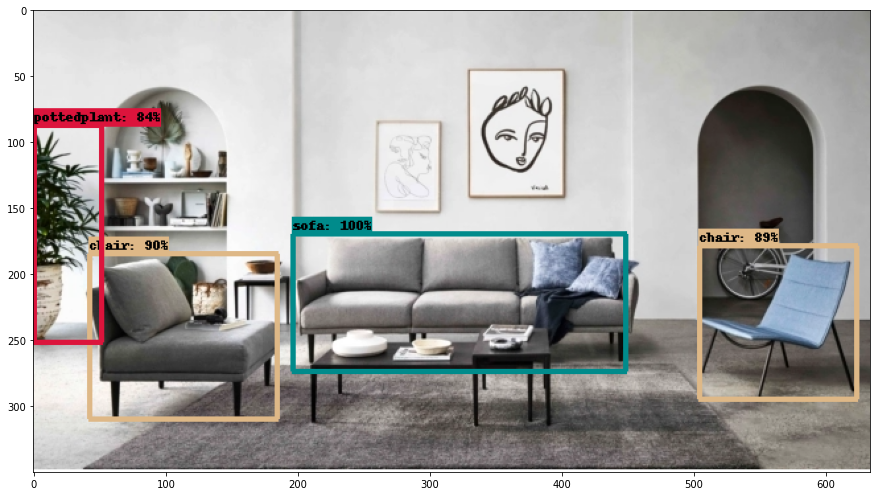

In [ ]:
for image_path in IMAGE_PATHS_SELS:

    print('Running inference for {}... '.format(image_path), end='')

    # image_path = TEST_IMAGE_PATH + image_path
    image_np = load_image_into_numpy_array(image_path)
    
    # Things to try:
    # Flip horizontally
    # image_np = np.fliplr(image_np).copy()

    # Convert image to grayscale
    # image_np = np.tile(
    #     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image_np)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]

    # input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=200,
          min_score_thresh=.60,
          agnostic_mode=False)

    plt.figure(figsize=(15,15))
    plt.imshow(image_np_with_detections)
    print('Done')

plt.show()
